In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

import pickle

from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv("emp_promotion.csv")
print('Shape of train data {}'.format(df.shape))



Shape of train data (54808, 14)


In [16]:

df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [17]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [5]:
df=df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

In [6]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
#Replacing nan with mode

print(df['education'].value_counts()) 
df['education'] = df['education'].fillna(df['education'].mode()[0])




Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [8]:

print(df['previous_year_rating'].value_counts())

df['previous_year_rating'] = df["previous_year_rating"].fillna(df['previous_year_rating'].mode()[0])



3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [9]:
negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]

negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [10]:
q1=np.quantile(df['length_of_service'],0.25) 
q3=np.quantile(df['length_of_service'],0.75)

IQR=q3-q1

upperBound=(1.5*IQR)+q3

lowerBound=(1.5*IQR)-q1

print('q1:',q1)

print('q3:',q3) 
print('IQR:',IQR)

print('Upper Bound :', upperBound)

print('Lower Bound :',lowerBound)

print('Skewed data :',len(df[df['length_of_service']>upperBound]))

q1: 3.0
q3: 7.0
IQR: 4.0
Upper Bound : 13.0
Lower Bound : 3.0
Skewed data : 3489


In [11]:
#Feature mapping is done on education column

df['education']=df['education'].replace(("Below Secondary", "Bachelor's", "Master's & above"),(1,2,3))

lb=LabelEncoder()

df['department']=lb.fit_transform(df['department'])

In [12]:


# Splitting data and resampling it

x = df.drop('is_promoted', axis=1) 
y=df['is_promoted'] 
print(x.shape) 
print(y.shape)


(54808, 9)
(54808,)


In [13]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

sm =SMOTE()

x_resample, y_resample = sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

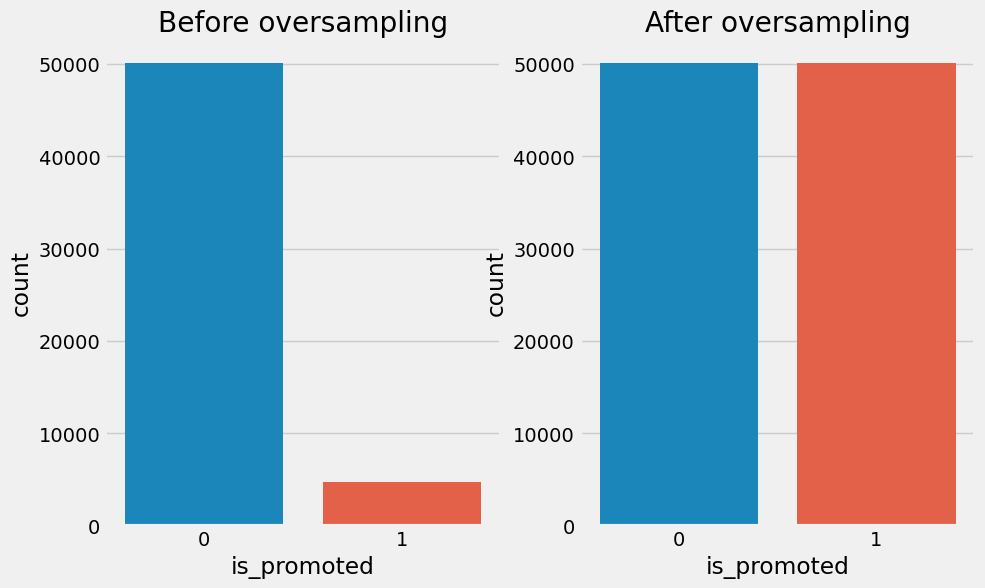

In [15]:
plt.figure(figsize=(10,6))

plt.subplot(121) 
sns.countplot(y)

plt.title('Before oversampling')

plt.subplot(122)

sns.countplot(y_resample) 
plt.title('After oversampling')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)
print('Shape of x_train {}'.format(x_train.shape))

print('Shape of y_train {}'.format(y_train.shape)) 
print('Shape of x_test {}'.format(x_test.shape))

print('Shape of y_test {}'.format(y_test.shape))



Shape of x_train (70196, 9)
Shape of y_train (70196,)
Shape of x_test (30084, 9)
Shape of y_test (30084,)


In [17]:
def randomForest(x_train,x_test,y_train,y_test):
 rf=RandomForestClassifier()
 rf.fit(x_train,y_train)
 yPred=rf.predict(x_test)
 print("RandomForestClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,yPred))
 print('Classification report') 
 print(classification_report(y_test,yPred))


In [18]:

rf=RandomForestClassifier() 
rf.fit(x_train,y_train) 
yPred=rf.predict(x_test)

cv= cross_val_score(rf,x_resample,y_resample,cv=5)

np.mean(cv)



0.938512165935381

In [19]:

pickle.dump(rf, open('promotion_model.pkl', 'wb'))
